## Training with normal and inverted Images

In [2]:
import os 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import RMSprop

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Network trained on normal images

In [3]:
(_x_train, _y_train), (_x_test, _y_test) = mnist.load_data()

In [39]:
x_train = (_x_train.reshape(60000, 784).astype("float32") / 255)[:500,:]
x_test = _x_test.reshape(10000, 784).astype("float32") / 255

y_train = keras.utils.to_categorical(_y_train, 10)[:500,:]
y_test = keras.utils.to_categorical(_y_test, 10)

print(f"x_train shape: {x_train.shape}\ny_train shape: {y_train.shape}\nx_test shape: {x_test.shape}\ny_test shape: {y_test.shape}\n")

x_train shape: (500, 784)
y_train shape: (500, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)



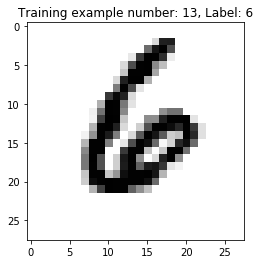

In [40]:
def display_sample(num, inverted=False):
    digit = x_train[num].reshape(28,28)
    if inverted:
        digit = inverted_x_train[num].reshape(28,28)
    plt.figure()
    plt.title(f"Training example number: {num}, Label: {y_train[num].argmax(axis=0)}")
    plt.imshow(digit, cmap = plt.get_cmap("gray_r"))
    plt.show()

display_sample(13)

In [41]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

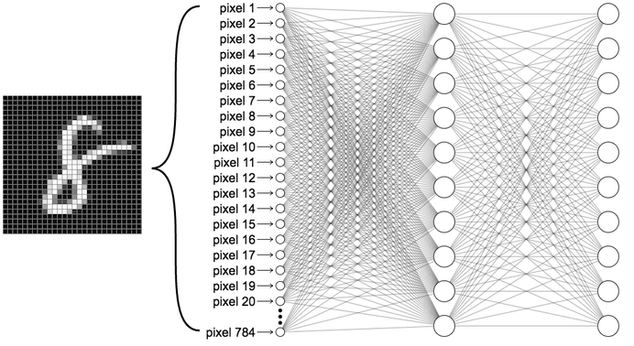

In [42]:
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=["accuracy"])

In [43]:
averages = []

In [44]:
trials = []
accs = []
accuracies = 0
examples = 500
counts = [1000, 2000, 5000, 10000, 20000, 40000, 60000]
k = 0
while examples <= 40000:
    x_train = (_x_train.reshape(60000, 784).astype("float32") / 255)[:examples,:]
    y_train = keras.utils.to_categorical(_y_train, 10)[:examples,:]
    for i in range(1,32):
        print(f"Trial number: {i}")
        history = model.fit(x_train, y_train,
                       batch_size=100,
                       epochs=10,
                       verbose=2,
                       validation_data=(x_test,y_test))
        acc = model.evaluate(x_test, y_test, verbose=0)[1]
        trial = "| {0} | {1} |".format(i,  acc)
        accs.append(acc)
        accuracies += acc
        trials.append(trial)
    average = accuracies / 31
    averages.append(average)
    accuracies = 0
    for t in trials:
        print(t)
    print(f"Average: {average}")
    examples = counts[k]
    k += 1

Trial number: 1
Train on 500 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 1.5281 - acc: 0.5700 - val_loss: 1.0071 - val_acc: 0.7232
Epoch 2/10
 - 0s - loss: 0.6390 - acc: 0.8680 - val_loss: 0.7937 - val_acc: 0.7583
Epoch 3/10
 - 0s - loss: 0.4321 - acc: 0.9080 - val_loss: 0.6455 - val_acc: 0.8120
Epoch 4/10
 - 0s - loss: 0.3221 - acc: 0.9260 - val_loss: 0.6342 - val_acc: 0.7996
Epoch 5/10
 - 0s - loss: 0.2439 - acc: 0.9660 - val_loss: 0.5821 - val_acc: 0.8249
Epoch 6/10
 - 0s - loss: 0.1939 - acc: 0.9740 - val_loss: 0.5297 - val_acc: 0.8389
Epoch 7/10
 - 0s - loss: 0.1575 - acc: 0.9700 - val_loss: 0.5364 - val_acc: 0.8327
Epoch 8/10
 - 0s - loss: 0.1185 - acc: 0.9900 - val_loss: 0.5054 - val_acc: 0.8399
Epoch 9/10
 - 0s - loss: 0.0970 - acc: 0.9940 - val_loss: 0.5547 - val_acc: 0.8301
Epoch 10/10
 - 0s - loss: 0.0838 - acc: 0.9960 - val_loss: 0.5285 - val_acc: 0.8307
Trial number: 2
Train on 500 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 0.0623 - acc: 0.

Epoch 10/10
 - 0s - loss: 2.4426e-07 - acc: 1.0000 - val_loss: 1.0212 - val_acc: 0.8535
Trial number: 10
Train on 500 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 2.3639e-07 - acc: 1.0000 - val_loss: 1.0235 - val_acc: 0.8529
Epoch 2/10
 - 1s - loss: 2.3103e-07 - acc: 1.0000 - val_loss: 1.0239 - val_acc: 0.8531
Epoch 3/10
 - 1s - loss: 2.2602e-07 - acc: 1.0000 - val_loss: 1.0264 - val_acc: 0.8532
Epoch 4/10
 - 1s - loss: 2.2101e-07 - acc: 1.0000 - val_loss: 1.0268 - val_acc: 0.8529
Epoch 5/10
 - 0s - loss: 2.1529e-07 - acc: 1.0000 - val_loss: 1.0283 - val_acc: 0.8529
Epoch 6/10
 - 0s - loss: 2.0885e-07 - acc: 1.0000 - val_loss: 1.0288 - val_acc: 0.8527
Epoch 7/10
 - 1s - loss: 2.0456e-07 - acc: 1.0000 - val_loss: 1.0301 - val_acc: 0.8529
Epoch 8/10
 - 1s - loss: 2.0170e-07 - acc: 1.0000 - val_loss: 1.0317 - val_acc: 0.8529
Epoch 9/10
 - 1s - loss: 1.9813e-07 - acc: 1.0000 - val_loss: 1.0326 - val_acc: 0.8527
Epoch 10/10
 - 1s - loss: 1.9491e-07 - acc: 1.0000 - val_loss: 1

Epoch 8/10
 - 0s - loss: 1.2362e-07 - acc: 1.0000 - val_loss: 1.0751 - val_acc: 0.8523
Epoch 9/10
 - 0s - loss: 1.2350e-07 - acc: 1.0000 - val_loss: 1.0755 - val_acc: 0.8519
Epoch 10/10
 - 0s - loss: 1.2326e-07 - acc: 1.0000 - val_loss: 1.0759 - val_acc: 0.8523
Trial number: 19
Train on 500 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 1.2338e-07 - acc: 1.0000 - val_loss: 1.0761 - val_acc: 0.8521
Epoch 2/10
 - 1s - loss: 1.2326e-07 - acc: 1.0000 - val_loss: 1.0763 - val_acc: 0.8522
Epoch 3/10
 - 1s - loss: 1.2290e-07 - acc: 1.0000 - val_loss: 1.0767 - val_acc: 0.8520
Epoch 4/10
 - 0s - loss: 1.2290e-07 - acc: 1.0000 - val_loss: 1.0773 - val_acc: 0.8521
Epoch 5/10
 - 1s - loss: 1.2267e-07 - acc: 1.0000 - val_loss: 1.0773 - val_acc: 0.8520
Epoch 6/10
 - 0s - loss: 1.2255e-07 - acc: 1.0000 - val_loss: 1.0775 - val_acc: 0.8521
Epoch 7/10
 - 0s - loss: 1.2243e-07 - acc: 1.0000 - val_loss: 1.0779 - val_acc: 0.8522
Epoch 8/10
 - 0s - loss: 1.2219e-07 - acc: 1.0000 - val_loss: 1.

Epoch 6/10
 - 1s - loss: 1.1969e-07 - acc: 1.0000 - val_loss: 1.0930 - val_acc: 0.8515
Epoch 7/10
 - 1s - loss: 1.1969e-07 - acc: 1.0000 - val_loss: 1.0929 - val_acc: 0.8514
Epoch 8/10
 - 1s - loss: 1.1969e-07 - acc: 1.0000 - val_loss: 1.0930 - val_acc: 0.8515
Epoch 9/10
 - 1s - loss: 1.1957e-07 - acc: 1.0000 - val_loss: 1.0931 - val_acc: 0.8514
Epoch 10/10
 - 1s - loss: 1.1969e-07 - acc: 1.0000 - val_loss: 1.0932 - val_acc: 0.8515
Trial number: 28
Train on 500 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 1.1969e-07 - acc: 1.0000 - val_loss: 1.0932 - val_acc: 0.8515
Epoch 2/10
 - 1s - loss: 1.1969e-07 - acc: 1.0000 - val_loss: 1.0933 - val_acc: 0.8515
Epoch 3/10
 - 1s - loss: 1.1969e-07 - acc: 1.0000 - val_loss: 1.0934 - val_acc: 0.8515
Epoch 4/10
 - 1s - loss: 1.1957e-07 - acc: 1.0000 - val_loss: 1.0935 - val_acc: 0.8515
Epoch 5/10
 - 1s - loss: 1.1957e-07 - acc: 1.0000 - val_loss: 1.0938 - val_acc: 0.8515
Epoch 6/10
 - 1s - loss: 1.1957e-07 - acc: 1.0000 - val_loss: 1.

 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.8851 - val_acc: 0.8824
Trial number: 5
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.8897 - val_acc: 0.8836
Epoch 2/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9078 - val_acc: 0.8810
Epoch 3/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9111 - val_acc: 0.8805
Epoch 4/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9139 - val_acc: 0.8817
Epoch 5/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9083 - val_acc: 0.8821
Epoch 6/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9157 - val_acc: 0.8820
Epoch 7/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9348 - val_acc: 0.8819
Epoch 8/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9193 - val_acc: 0.8829
Epoch 9/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9273 - val_acc: 0.8826
Epoch 10/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9389 - val_acc: 0.8823
Trial number: 6
Train on 1000 sa

 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9855 - val_acc: 0.8833
Epoch 2/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9859 - val_acc: 0.8833
Epoch 3/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9863 - val_acc: 0.8833
Epoch 4/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9864 - val_acc: 0.8833
Epoch 5/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9867 - val_acc: 0.8834
Epoch 6/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9869 - val_acc: 0.8832
Epoch 7/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9874 - val_acc: 0.8833
Epoch 8/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9871 - val_acc: 0.8833
Epoch 9/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9873 - val_acc: 0.8834
Epoch 10/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9879 - val_acc: 0.8834
Trial number: 15
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9884 - val_acc: 0.8834
Epoch 2/10
 - 1s - loss: 0.0967

Epoch 3/10
 - 0s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9984 - val_acc: 0.8831
Epoch 4/10
 - 0s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9985 - val_acc: 0.8831
Epoch 5/10
 - 0s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9985 - val_acc: 0.8831
Epoch 6/10
 - 0s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9987 - val_acc: 0.8831
Epoch 7/10
 - 0s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9986 - val_acc: 0.8831
Epoch 8/10
 - 0s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9988 - val_acc: 0.8831
Epoch 9/10
 - 0s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9987 - val_acc: 0.8831
Epoch 10/10
 - 0s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9987 - val_acc: 0.8831
Trial number: 24
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9990 - val_acc: 0.8831
Epoch 2/10
 - 0s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9989 - val_acc: 0.8831
Epoch 3/10
 - 1s - loss: 0.0967 - acc: 0.9940 - val_loss: 0.9989 - val_acc: 0.8831
Epoch 4/10
 - 1s - l

Trial number: 1
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.5779 - acc: 0.9395 - val_loss: 0.9012 - val_acc: 0.8902
Epoch 2/10
 - 1s - loss: 0.3844 - acc: 0.9575 - val_loss: 0.8489 - val_acc: 0.8931
Epoch 3/10
 - 1s - loss: 0.2878 - acc: 0.9675 - val_loss: 0.8536 - val_acc: 0.8939
Epoch 4/10
 - 1s - loss: 0.2436 - acc: 0.9700 - val_loss: 0.7991 - val_acc: 0.8981
Epoch 5/10
 - 1s - loss: 0.1894 - acc: 0.9810 - val_loss: 0.7574 - val_acc: 0.8990
Epoch 6/10
 - 1s - loss: 0.1721 - acc: 0.9840 - val_loss: 0.8236 - val_acc: 0.8924
Epoch 7/10
 - 1s - loss: 0.1534 - acc: 0.9865 - val_loss: 0.7673 - val_acc: 0.8987
Epoch 8/10
 - 1s - loss: 0.1442 - acc: 0.9865 - val_loss: 0.7336 - val_acc: 0.9006
Epoch 9/10
 - 1s - loss: 0.1311 - acc: 0.9885 - val_loss: 0.7335 - val_acc: 0.9033
Epoch 10/10
 - 1s - loss: 0.1233 - acc: 0.9910 - val_loss: 0.7246 - val_acc: 0.9054
Trial number: 2
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.1213 - acc: 

Epoch 2/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7690 - val_acc: 0.9114
Epoch 3/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7692 - val_acc: 0.9115
Epoch 4/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7690 - val_acc: 0.9116
Epoch 5/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7695 - val_acc: 0.9119
Epoch 6/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7703 - val_acc: 0.9115
Epoch 7/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7693 - val_acc: 0.9116
Epoch 8/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7705 - val_acc: 0.9114
Epoch 9/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7702 - val_acc: 0.9117
Epoch 10/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7699 - val_acc: 0.9116
Trial number: 11
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7706 - val_acc: 0.9119
Epoch 2/10
 - 0s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7703 - val_acc: 0.9115
Epoch 3/10
 - 1s - l

Epoch 4/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7803 - val_acc: 0.9120
Epoch 5/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7803 - val_acc: 0.9120
Epoch 6/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7803 - val_acc: 0.9120
Epoch 7/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7804 - val_acc: 0.9120
Epoch 8/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7806 - val_acc: 0.9120
Epoch 9/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7809 - val_acc: 0.9121
Epoch 10/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7810 - val_acc: 0.9121
Trial number: 20
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7809 - val_acc: 0.9121
Epoch 2/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7808 - val_acc: 0.9121
Epoch 3/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7805 - val_acc: 0.9120
Epoch 4/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7812 - val_acc: 0.9122
Epoch 5/10
 - 1s - l

Epoch 6/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7829 - val_acc: 0.9118
Epoch 7/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7830 - val_acc: 0.9118
Epoch 8/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7831 - val_acc: 0.9118
Epoch 9/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7829 - val_acc: 0.9118
Epoch 10/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7831 - val_acc: 0.9118
Trial number: 29
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7831 - val_acc: 0.9118
Epoch 2/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7831 - val_acc: 0.9117
Epoch 3/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7831 - val_acc: 0.9118
Epoch 4/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7831 - val_acc: 0.9118
Epoch 5/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7832 - val_acc: 0.9117
Epoch 6/10
 - 1s - loss: 0.0886 - acc: 0.9945 - val_loss: 0.7831 - val_acc: 0.9118
Epoch 7/10
 - 1s - l

 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4807 - val_acc: 0.9422
Epoch 2/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4825 - val_acc: 0.9421
Epoch 3/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4825 - val_acc: 0.9429
Epoch 4/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4841 - val_acc: 0.9423
Epoch 5/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4838 - val_acc: 0.9430
Epoch 6/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4840 - val_acc: 0.9429
Epoch 7/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4844 - val_acc: 0.9426
Epoch 8/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4850 - val_acc: 0.9431
Epoch 9/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4862 - val_acc: 0.9427
Epoch 10/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4865 - val_acc: 0.9428
Trial number: 6
Train on 5000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4870 - val_acc: 0.9429
Epoch 2/10
 - 1s - loss: 0.0548 

Epoch 3/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4971 - val_acc: 0.9435
Epoch 4/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4972 - val_acc: 0.9436
Epoch 5/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4972 - val_acc: 0.9435
Epoch 6/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4974 - val_acc: 0.9435
Epoch 7/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4974 - val_acc: 0.9435
Epoch 8/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4974 - val_acc: 0.9436
Epoch 9/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4975 - val_acc: 0.9434
Epoch 10/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4975 - val_acc: 0.9434
Trial number: 15
Train on 5000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4976 - val_acc: 0.9434
Epoch 2/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4976 - val_acc: 0.9434
Epoch 3/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4977 - val_acc: 0.9434
Epoch 4/10
 - 1s - l

Epoch 5/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4999 - val_acc: 0.9431
Epoch 6/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4999 - val_acc: 0.9431
Epoch 7/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4999 - val_acc: 0.9431
Epoch 8/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4999 - val_acc: 0.9430
Epoch 9/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4999 - val_acc: 0.9431
Epoch 10/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4999 - val_acc: 0.9431
Trial number: 24
Train on 5000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.5000 - val_acc: 0.9431
Epoch 2/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4999 - val_acc: 0.9430
Epoch 3/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.4999 - val_acc: 0.9431
Epoch 4/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.5000 - val_acc: 0.9431
Epoch 5/10
 - 1s - loss: 0.0548 - acc: 0.9966 - val_loss: 0.5000 - val_acc: 0.9431
Epoch 6/10
 - 1s - l

Trial number: 1
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.2874 - acc: 0.9672 - val_loss: 0.5112 - val_acc: 0.9332
Epoch 2/10
 - 2s - loss: 0.1782 - acc: 0.9774 - val_loss: 0.4317 - val_acc: 0.9415
Epoch 3/10
 - 2s - loss: 0.1252 - acc: 0.9827 - val_loss: 0.4026 - val_acc: 0.9419
Epoch 4/10
 - 2s - loss: 0.0924 - acc: 0.9861 - val_loss: 0.3537 - val_acc: 0.9485
Epoch 5/10
 - 2s - loss: 0.0650 - acc: 0.9915 - val_loss: 0.3453 - val_acc: 0.9496
Epoch 6/10
 - 2s - loss: 0.0561 - acc: 0.9927 - val_loss: 0.3781 - val_acc: 0.9463
Epoch 7/10
 - 2s - loss: 0.0510 - acc: 0.9941 - val_loss: 0.3614 - val_acc: 0.9483
Epoch 8/10
 - 1s - loss: 0.0455 - acc: 0.9960 - val_loss: 0.3834 - val_acc: 0.9455
Epoch 9/10
 - 1s - loss: 0.0432 - acc: 0.9967 - val_loss: 0.3595 - val_acc: 0.9499
Epoch 10/10
 - 1s - loss: 0.0423 - acc: 0.9968 - val_loss: 0.3540 - val_acc: 0.9526
Trial number: 2
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0423 - acc

Epoch 2/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3711 - val_acc: 0.9580
Epoch 3/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3711 - val_acc: 0.9579
Epoch 4/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3713 - val_acc: 0.9578
Epoch 5/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3711 - val_acc: 0.9579
Epoch 6/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3713 - val_acc: 0.9580
Epoch 7/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3714 - val_acc: 0.9580
Epoch 8/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3713 - val_acc: 0.9583
Epoch 9/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3714 - val_acc: 0.9579
Epoch 10/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3714 - val_acc: 0.9579
Trial number: 11
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3714 - val_acc: 0.9580
Epoch 2/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3716 - val_acc: 0.9581
Epoch 3/10
 - 1s - 

Epoch 4/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3732 - val_acc: 0.9582
Epoch 5/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3732 - val_acc: 0.9583
Epoch 6/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3732 - val_acc: 0.9582
Epoch 7/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3732 - val_acc: 0.9583
Epoch 8/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3732 - val_acc: 0.9583
Epoch 9/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3732 - val_acc: 0.9583
Epoch 10/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3732 - val_acc: 0.9583
Trial number: 20
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3732 - val_acc: 0.9583
Epoch 2/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3732 - val_acc: 0.9583
Epoch 3/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3732 - val_acc: 0.9583
Epoch 4/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3732 - val_acc: 0.9583
Epoch 5/10
 - 1s - 

Epoch 6/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3734 - val_acc: 0.9582
Epoch 7/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3734 - val_acc: 0.9582
Epoch 8/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3734 - val_acc: 0.9582
Epoch 9/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3734 - val_acc: 0.9582
Epoch 10/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3734 - val_acc: 0.9582
Trial number: 29
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3734 - val_acc: 0.9582
Epoch 2/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3734 - val_acc: 0.9582
Epoch 3/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3734 - val_acc: 0.9582
Epoch 4/10
 - 1s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3734 - val_acc: 0.9582
Epoch 5/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3734 - val_acc: 0.9582
Epoch 6/10
 - 2s - loss: 0.0387 - acc: 0.9976 - val_loss: 0.3734 - val_acc: 0.9582
Epoch 7/10
 - 2s - 

Trial number: 4
Train on 20000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2688 - val_acc: 0.9678
Epoch 2/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2459 - val_acc: 0.9714
Epoch 3/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2615 - val_acc: 0.9686
Epoch 4/10
 - 3s - loss: 0.0267 - acc: 0.9983 - val_loss: 0.2516 - val_acc: 0.9703
Epoch 5/10
 - 3s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2479 - val_acc: 0.9706
Epoch 6/10
 - 3s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2474 - val_acc: 0.9709
Epoch 7/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2471 - val_acc: 0.9709
Epoch 8/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2483 - val_acc: 0.9708
Epoch 9/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2483 - val_acc: 0.9709
Epoch 10/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2489 - val_acc: 0.9707
Trial number: 5
Train on 20000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.0266 - acc

Epoch 2/10
 - 3s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2532 - val_acc: 0.9706
Epoch 3/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2532 - val_acc: 0.9705
Epoch 4/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2532 - val_acc: 0.9706
Epoch 5/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2533 - val_acc: 0.9705
Epoch 6/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2532 - val_acc: 0.9706
Epoch 7/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2532 - val_acc: 0.9705
Epoch 8/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2533 - val_acc: 0.9705
Epoch 9/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2534 - val_acc: 0.9706
Epoch 10/10
 - 3s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2533 - val_acc: 0.9706
Trial number: 14
Train on 20000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2533 - val_acc: 0.9706
Epoch 2/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2534 - val_acc: 0.9706
Epoch 3/10
 - 2s - 

Epoch 4/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 5/10
 - 3s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 6/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9706
Epoch 7/10
 - 3s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 8/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 9/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 10/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Trial number: 23
Train on 20000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 2/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 3/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 4/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 5/10
 - 2s - 

Epoch 6/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 7/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 8/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 9/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
Epoch 10/10
 - 2s - loss: 0.0266 - acc: 0.9984 - val_loss: 0.2540 - val_acc: 0.9707
| 1 | 0.8307 |
| 2 | 0.8489 |
| 3 | 0.8509 |
| 4 | 0.851 |
| 5 | 0.8482 |
| 6 | 0.8511 |
| 7 | 0.8531 |
| 8 | 0.8531 |
| 9 | 0.8535 |
| 10 | 0.853 |
| 11 | 0.8531 |
| 12 | 0.8528 |
| 13 | 0.8527 |
| 14 | 0.8525 |
| 15 | 0.8523 |
| 16 | 0.8524 |
| 17 | 0.8522 |
| 18 | 0.8523 |
| 19 | 0.852 |
| 20 | 0.852 |
| 21 | 0.852 |
| 22 | 0.852 |
| 23 | 0.852 |
| 24 | 0.8518 |
| 25 | 0.8517 |
| 26 | 0.8515 |
| 27 | 0.8515 |
| 28 | 0.8514 |
| 29 | 0.8513 |
| 30 | 0.8514 |
| 31 | 0.8514 |
| 1 | 0.8744 |
| 2 | 0.8807 |
| 3 | 0.8726 |
| 4 | 0.8824 |
| 5 | 0.8823 |
| 6 | 0.8828 |
| 7 | 0.8827 |

Epoch 5/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1906 - val_acc: 0.9781
Epoch 6/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1906 - val_acc: 0.9781
Epoch 7/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1905 - val_acc: 0.9780
Epoch 8/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1905 - val_acc: 0.9781
Epoch 9/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1907 - val_acc: 0.9781
Epoch 10/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1907 - val_acc: 0.9780
Trial number: 7
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1907 - val_acc: 0.9781
Epoch 2/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1906 - val_acc: 0.9780
Epoch 3/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1907 - val_acc: 0.9780
Epoch 4/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1908 - val_acc: 0.9780
Epoch 5/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1909 - val_acc: 0.9779
Epoch 6/10
 - 4s - l

Epoch 7/10
 - 3s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1914 - val_acc: 0.9780
Epoch 8/10
 - 3s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1914 - val_acc: 0.9780
Epoch 9/10
 - 3s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1914 - val_acc: 0.9780
Epoch 10/10
 - 3s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1914 - val_acc: 0.9780
Trial number: 16
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1914 - val_acc: 0.9780
Epoch 2/10
 - 3s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1914 - val_acc: 0.9781
Epoch 3/10
 - 3s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1914 - val_acc: 0.9780
Epoch 4/10
 - 3s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1914 - val_acc: 0.9780
Epoch 5/10
 - 3s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1914 - val_acc: 0.9780
Epoch 6/10
 - 3s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1914 - val_acc: 0.9780
Epoch 7/10
 - 3s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1914 - val_acc: 0.9781
Epoch 8/10
 - 3s - 

Epoch 9/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1915 - val_acc: 0.9780
Epoch 10/10
 - 5s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1915 - val_acc: 0.9780
Trial number: 25
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1915 - val_acc: 0.9780
Epoch 2/10
 - 5s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1915 - val_acc: 0.9780
Epoch 3/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1915 - val_acc: 0.9780
Epoch 4/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1915 - val_acc: 0.9780
Epoch 5/10
 - 4s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1915 - val_acc: 0.9780
Epoch 6/10
 - 5s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1915 - val_acc: 0.9780
Epoch 7/10
 - 5s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1915 - val_acc: 0.9780
Epoch 8/10
 - 5s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1915 - val_acc: 0.9780
Epoch 9/10
 - 5s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.1915 - val_acc: 0.9780
Epoch 10/10
 - 6s -

[0.8511548387096777, 0.8823999999999996, 0.9115645161290319, 0.9426000000000007, 0.957812903225807, 0.9704290322580648, 0.9779645161290328, 0.9815387096774097]


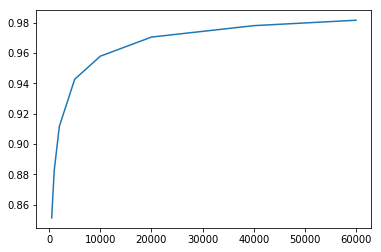

In [49]:
print(averages)
plt.figure()
plt.plot([500, 1000, 2000, 5000, 10000, 20000, 40000, 60000], averages)
plt.show()

## 250 examples

In [ ]:
x_train = (_x_train.reshape(60000, 784).astype("float32") / 255)[:250,:]
x_test = _x_test.reshape(10000, 784).astype("float32") / 255

y_train = keras.utils.to_categorical(_y_train, 10)[:250,:]
y_test = keras.utils.to_categorical(_y_test, 10)

print(f"x_train shape: {x_train.shape}\ny_train shape: {y_train.shape}\nx_test shape: {x_test.shape}\ny_test shape: {y_test.shape}\n")

In [4]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

In [5]:
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(),
              metrics=["accuracy"])

In [6]:
x_train = (_x_train.reshape(60000, 784).astype("float32") / 255)[:250,:]
x_test = _x_test.reshape(10000, 784).astype("float32") / 255

y_train = keras.utils.to_categorical(_y_train, 10)[:250,:]
y_test = keras.utils.to_categorical(_y_test, 10)

trials = []
accs = []
accuracies = 0 
for i in range(1,32):
    print(f"Trial number: {i}")
    history = model.fit(x_train, y_train,
                   batch_size=100,
                   epochs=10,
                   verbose=2,
                   validation_data=(x_test,y_test))
    acc = model.evaluate(x_test, y_test, verbose=0)[1]
    trial = "| {0} | {1} |".format(i,  acc)
    accs.append(acc)
    accuracies += acc
    trials.append(trial)
average = accuracies / 31
for t in trials:
    print(t)
print(f"Average: {average}")

Trial number: 1
Train on 250 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 1.9225 - acc: 0.3720 - val_loss: 1.4567 - val_acc: 0.5403
Epoch 2/10
 - 0s - loss: 0.9226 - acc: 0.8120 - val_loss: 1.0693 - val_acc: 0.6975
Epoch 3/10
 - 0s - loss: 0.5691 - acc: 0.9160 - val_loss: 0.8984 - val_acc: 0.7445
Epoch 4/10
 - 0s - loss: 0.3904 - acc: 0.9360 - val_loss: 0.8651 - val_acc: 0.7209
Epoch 5/10
 - 0s - loss: 0.3106 - acc: 0.9560 - val_loss: 0.8466 - val_acc: 0.7495
Epoch 6/10
 - 0s - loss: 0.2700 - acc: 0.9680 - val_loss: 0.8022 - val_acc: 0.7521
Epoch 7/10
 - 0s - loss: 0.2158 - acc: 0.9720 - val_loss: 0.7016 - val_acc: 0.7884
Epoch 8/10
 - 0s - loss: 0.1615 - acc: 0.9840 - val_loss: 0.7332 - val_acc: 0.7736
Epoch 9/10
 - 0s - loss: 0.1395 - acc: 0.9840 - val_loss: 0.7017 - val_acc: 0.7843
Epoch 10/10
 - 0s - loss: 0.1079 - acc: 1.0000 - val_loss: 0.7349 - val_acc: 0.7708
Trial number: 2
Train on 250 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 0.0886 - acc: 0.

Trial number: 10
Train on 250 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 1.6639e-06 - acc: 1.0000 - val_loss: 1.2614 - val_acc: 0.7973
Epoch 2/10
 - 0s - loss: 1.5576e-06 - acc: 1.0000 - val_loss: 1.2591 - val_acc: 0.7978
Epoch 3/10
 - 0s - loss: 1.3888e-06 - acc: 1.0000 - val_loss: 1.2716 - val_acc: 0.7969
Epoch 4/10
 - 0s - loss: 1.3011e-06 - acc: 1.0000 - val_loss: 1.2800 - val_acc: 0.7974
Epoch 5/10
 - 0s - loss: 1.1857e-06 - acc: 1.0000 - val_loss: 1.2928 - val_acc: 0.7953
Epoch 6/10
 - 0s - loss: 1.0886e-06 - acc: 1.0000 - val_loss: 1.2866 - val_acc: 0.7975
Epoch 7/10
 - 0s - loss: 9.9564e-07 - acc: 1.0000 - val_loss: 1.2884 - val_acc: 0.7986
Epoch 8/10
 - 0s - loss: 9.1601e-07 - acc: 1.0000 - val_loss: 1.2940 - val_acc: 0.7989
Epoch 9/10
 - 0s - loss: 8.4996e-07 - acc: 1.0000 - val_loss: 1.2970 - val_acc: 0.7994
Epoch 10/10
 - 0s - loss: 7.8654e-07 - acc: 1.0000 - val_loss: 1.3125 - val_acc: 0.7975
Trial number: 11
Train on 250 samples, validate on 10000 samples

Epoch 9/10
 - 0s - loss: 1.3447e-07 - acc: 1.0000 - val_loss: 1.4258 - val_acc: 0.7974
Epoch 10/10
 - 0s - loss: 1.3328e-07 - acc: 1.0000 - val_loss: 1.4250 - val_acc: 0.7976
Trial number: 19
Train on 250 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 1.3232e-07 - acc: 1.0000 - val_loss: 1.4252 - val_acc: 0.7976
Epoch 2/10
 - 0s - loss: 1.3185e-07 - acc: 1.0000 - val_loss: 1.4256 - val_acc: 0.7976
Epoch 3/10
 - 0s - loss: 1.3256e-07 - acc: 1.0000 - val_loss: 1.4254 - val_acc: 0.7975
Epoch 4/10
 - 0s - loss: 1.3113e-07 - acc: 1.0000 - val_loss: 1.4263 - val_acc: 0.7973
Epoch 5/10
 - 0s - loss: 1.3137e-07 - acc: 1.0000 - val_loss: 1.4272 - val_acc: 0.7976
Epoch 6/10
 - 0s - loss: 1.3089e-07 - acc: 1.0000 - val_loss: 1.4293 - val_acc: 0.7972
Epoch 7/10
 - 0s - loss: 1.2994e-07 - acc: 1.0000 - val_loss: 1.4297 - val_acc: 0.7974
Epoch 8/10
 - 0s - loss: 1.2994e-07 - acc: 1.0000 - val_loss: 1.4308 - val_acc: 0.7971
Epoch 9/10
 - 0s - loss: 1.2946e-07 - acc: 1.0000 - val_loss: 1.

Epoch 7/10
 - 0s - loss: 1.2088e-07 - acc: 1.0000 - val_loss: 1.4475 - val_acc: 0.7976
Epoch 8/10
 - 0s - loss: 1.2064e-07 - acc: 1.0000 - val_loss: 1.4476 - val_acc: 0.7977
Epoch 9/10
 - 0s - loss: 1.2064e-07 - acc: 1.0000 - val_loss: 1.4480 - val_acc: 0.7975
Epoch 10/10
 - 0s - loss: 1.2064e-07 - acc: 1.0000 - val_loss: 1.4479 - val_acc: 0.7978
Trial number: 28
Train on 250 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 1.2064e-07 - acc: 1.0000 - val_loss: 1.4485 - val_acc: 0.7976
Epoch 2/10
 - 0s - loss: 1.2016e-07 - acc: 1.0000 - val_loss: 1.4484 - val_acc: 0.7976
Epoch 3/10
 - 0s - loss: 1.2064e-07 - acc: 1.0000 - val_loss: 1.4487 - val_acc: 0.7976
Epoch 4/10
 - 0s - loss: 1.2016e-07 - acc: 1.0000 - val_loss: 1.4493 - val_acc: 0.7977
Epoch 5/10
 - 0s - loss: 1.2016e-07 - acc: 1.0000 - val_loss: 1.4492 - val_acc: 0.7978
Epoch 6/10
 - 0s - loss: 1.1969e-07 - acc: 1.0000 - val_loss: 1.4491 - val_acc: 0.7977
Epoch 7/10
 - 0s - loss: 1.1969e-07 - acc: 1.0000 - val_loss: 1.

### Network trained on inverted and non-inverted images

In [22]:
(_x_train, _y_train), (_x_test, _y_test) = mnist.load_data()

In [32]:
x_train = (_x_train.reshape(60000, 784).astype("float32") / 255)[:500,:]
inverted_x_train = ((255 - _x_train.reshape(60000, 784).astype("float32"))/255)[:500,:]
# display_sample(6, inverted=True)
x_train = np.concatenate((x_train, inverted_x_train), axis=0)
print(x_train.shape)
x_test = _x_test.reshape(10000, 784).astype("float32") / 255
y_train = keras.utils.to_categorical(_y_train, 10)[:500,:]
y_train =  np.concatenate((y_train, y_train), axis=0)
print(y_train.shape)
y_test = keras.utils.to_categorical(_y_test, 10)

print(f"x_train shape: {x_train.shape}\ny_train shape: {y_train.shape}\nx_test shape: {x_test.shape}\ny_test shape: {y_test.shape}\n")

(1000, 784)
(1000, 10)
x_train shape: (1000, 784)
y_train shape: (1000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)



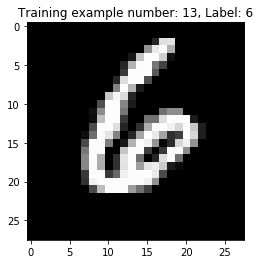

In [74]:
display_sample(13, True)

In [33]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

In [34]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=RMSprop())

In [35]:
trialsInv = []
accsInv = []
accuraciesInv = 0
examples = 500
counts = [1000, 2000, 5000, 10000, 20000, 40000, 60000]
k = 0
averagesInv = []
while examples <= 80000:
    x_train = (_x_train.reshape(60000, 784).astype("float32") / 255)[:examples,:]
    inverted_x_train = ((255 - _x_train.reshape(60000, 784).astype("float32"))/255)[:examples,:]
    x_train = np.concatenate((x_train, inverted_x_train), axis=0)
    y_train = keras.utils.to_categorical(_y_train, 10)[:examples,:]
    y_train = np.concatenate((y_train, y_train), axis=0)
    for i in range(1,32):
        print(f"Trial number: {i}")
        history = model.fit(x_train, y_train,
                       batch_size=100,
                       epochs=10,
                       verbose=2,
                       validation_data=(x_test,y_test))
        acc = model.evaluate(x_test, y_test, verbose=0)[1]
        trial = "| {0} | {1} |".format(i,  acc)
        accsInv.append(acc)
        accuraciesInv += acc
        trialsInv.append(trial)
    average = accuraciesInv / 31
    averagesInv.append(average)
    accuraciesInv = 0
    for t in trialsInv:
        print(t)
    print(f"Average: {average}")
    examples = counts[k]
    k += 1

Trial number: 1
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 4.0551 - acc: 0.2880 - val_loss: 1.2394 - val_acc: 0.7428
Epoch 2/10
 - 0s - loss: 1.7207 - acc: 0.4800 - val_loss: 0.9276 - val_acc: 0.7680
Epoch 3/10
 - 0s - loss: 1.4251 - acc: 0.5350 - val_loss: 0.7493 - val_acc: 0.7993
Epoch 4/10
 - 0s - loss: 1.2436 - acc: 0.5970 - val_loss: 0.6471 - val_acc: 0.8204
Epoch 5/10
 - 0s - loss: 1.0783 - acc: 0.6820 - val_loss: 0.5804 - val_acc: 0.8348
Epoch 6/10
 - 0s - loss: 1.0026 - acc: 0.6970 - val_loss: 0.5480 - val_acc: 0.8363
Epoch 7/10
 - 0s - loss: 0.8049 - acc: 0.7670 - val_loss: 0.5246 - val_acc: 0.8379
Epoch 8/10
 - 0s - loss: 0.8529 - acc: 0.7550 - val_loss: 0.4878 - val_acc: 0.8488
Epoch 9/10
 - 0s - loss: 0.6334 - acc: 0.8330 - val_loss: 0.4938 - val_acc: 0.8482
Epoch 10/10
 - 0s - loss: 0.6751 - acc: 0.8020 - val_loss: 0.5003 - val_acc: 0.8393
Trial number: 2
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 0.5495 - acc: 

Epoch 2/10
 - 1s - loss: 0.1573 - acc: 0.9680 - val_loss: 0.8801 - val_acc: 0.8658
Epoch 3/10
 - 0s - loss: 0.0102 - acc: 0.9990 - val_loss: 0.8745 - val_acc: 0.8663
Epoch 4/10
 - 1s - loss: 0.0099 - acc: 0.9990 - val_loss: 0.8769 - val_acc: 0.8662
Epoch 5/10
 - 1s - loss: 0.0080 - acc: 0.9990 - val_loss: 0.8715 - val_acc: 0.8665
Epoch 6/10
 - 0s - loss: 0.1379 - acc: 0.9650 - val_loss: 0.8727 - val_acc: 0.8663
Epoch 7/10
 - 1s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.8743 - val_acc: 0.8663
Epoch 8/10
 - 1s - loss: 0.1521 - acc: 0.9680 - val_loss: 0.8913 - val_acc: 0.8648
Epoch 9/10
 - 1s - loss: 0.0584 - acc: 0.9870 - val_loss: 0.8747 - val_acc: 0.8669
Epoch 10/10
 - 1s - loss: 0.0046 - acc: 1.0000 - val_loss: 0.8766 - val_acc: 0.8665
Trial number: 11
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0048 - acc: 1.0000 - val_loss: 0.8776 - val_acc: 0.8660
Epoch 2/10
 - 1s - loss: 0.1637 - acc: 0.9650 - val_loss: 0.8722 - val_acc: 0.8663
Epoch 3/10
 - 1s - l

Epoch 3/10
 - 0s - loss: 0.0068 - acc: 0.9970 - val_loss: 0.8892 - val_acc: 0.8680
Epoch 4/10
 - 0s - loss: 0.2514 - acc: 0.9510 - val_loss: 0.8685 - val_acc: 0.8689
Epoch 5/10
 - 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.8693 - val_acc: 0.8684
Epoch 6/10
 - 0s - loss: 7.6407e-04 - acc: 1.0000 - val_loss: 0.8697 - val_acc: 0.8686
Epoch 7/10
 - 1s - loss: 6.5327e-04 - acc: 1.0000 - val_loss: 0.8689 - val_acc: 0.8683
Epoch 8/10
 - 0s - loss: 5.7652e-04 - acc: 1.0000 - val_loss: 0.8701 - val_acc: 0.8677
Epoch 9/10
 - 0s - loss: 0.3023 - acc: 0.9480 - val_loss: 0.8611 - val_acc: 0.8697
Epoch 10/10
 - 1s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.8602 - val_acc: 0.8691
Trial number: 20
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 5.2632e-04 - acc: 1.0000 - val_loss: 0.8606 - val_acc: 0.8694
Epoch 2/10
 - 0s - loss: 4.2105e-04 - acc: 1.0000 - val_loss: 0.8616 - val_acc: 0.8691
Epoch 3/10
 - 0s - loss: 3.8928e-04 - acc: 1.0000 - val_loss: 0.8637 - val_acc: 0.8

Epoch 2/10
 - 0s - loss: 0.5291 - acc: 0.9340 - val_loss: 0.8668 - val_acc: 0.8685
Epoch 3/10
 - 0s - loss: 0.0023 - acc: 0.9990 - val_loss: 0.8583 - val_acc: 0.8698
Epoch 4/10
 - 0s - loss: 2.8362e-04 - acc: 1.0000 - val_loss: 0.8586 - val_acc: 0.8705
Epoch 5/10
 - 0s - loss: 1.8256e-04 - acc: 1.0000 - val_loss: 0.8596 - val_acc: 0.8705
Epoch 6/10
 - 0s - loss: 1.5332e-04 - acc: 1.0000 - val_loss: 0.8600 - val_acc: 0.8698
Epoch 7/10
 - 0s - loss: 1.2977e-04 - acc: 1.0000 - val_loss: 0.8606 - val_acc: 0.8699
Epoch 8/10
 - 0s - loss: 1.2151e-04 - acc: 1.0000 - val_loss: 0.8619 - val_acc: 0.8701
Epoch 9/10
 - 0s - loss: 1.0794e-04 - acc: 1.0000 - val_loss: 0.8632 - val_acc: 0.8700
Epoch 10/10
 - 0s - loss: 1.2692e-04 - acc: 1.0000 - val_loss: 0.8616 - val_acc: 0.8692
Trial number: 29
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 0.6340 - acc: 0.9290 - val_loss: 0.8678 - val_acc: 0.8699
Epoch 2/10
 - 0s - loss: 6.2341e-04 - acc: 1.0000 - val_loss: 0.8625 - val_

Epoch 7/10
 - 0s - loss: 0.0963 - acc: 0.9780 - val_loss: 0.7048 - val_acc: 0.9004
Epoch 8/10
 - 0s - loss: 0.0379 - acc: 0.9930 - val_loss: 0.6946 - val_acc: 0.9024
Epoch 9/10
 - 0s - loss: 0.1277 - acc: 0.9785 - val_loss: 0.6975 - val_acc: 0.9023
Epoch 10/10
 - 0s - loss: 0.0641 - acc: 0.9880 - val_loss: 0.7007 - val_acc: 0.9014
Trial number: 6
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 0.0757 - acc: 0.9845 - val_loss: 0.6938 - val_acc: 0.9036
Epoch 2/10
 - 1s - loss: 0.1047 - acc: 0.9845 - val_loss: 0.7016 - val_acc: 0.9028
Epoch 3/10
 - 0s - loss: 0.0749 - acc: 0.9845 - val_loss: 0.7043 - val_acc: 0.9032
Epoch 4/10
 - 0s - loss: 0.0266 - acc: 0.9980 - val_loss: 0.7088 - val_acc: 0.9024
Epoch 5/10
 - 0s - loss: 0.0860 - acc: 0.9875 - val_loss: 0.7120 - val_acc: 0.9015
Epoch 6/10
 - 1s - loss: 0.0592 - acc: 0.9895 - val_loss: 0.7059 - val_acc: 0.9025
Epoch 7/10
 - 0s - loss: 0.0254 - acc: 0.9985 - val_loss: 0.7013 - val_acc: 0.9035
Epoch 8/10
 - 0s - lo

Epoch 9/10
 - 0s - loss: 0.0251 - acc: 0.9980 - val_loss: 0.7049 - val_acc: 0.9044
Epoch 10/10
 - 0s - loss: 0.0243 - acc: 0.9985 - val_loss: 0.7023 - val_acc: 0.9040
Trial number: 15
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 0.0243 - acc: 0.9985 - val_loss: 0.7017 - val_acc: 0.9043
Epoch 2/10
 - 0s - loss: 0.3711 - acc: 0.9675 - val_loss: 0.7071 - val_acc: 0.9053
Epoch 3/10
 - 0s - loss: 0.1425 - acc: 0.9840 - val_loss: 0.7206 - val_acc: 0.9040
Epoch 4/10
 - 0s - loss: 0.0266 - acc: 0.9970 - val_loss: 0.6986 - val_acc: 0.9061
Epoch 5/10
 - 0s - loss: 0.0243 - acc: 0.9985 - val_loss: 0.7001 - val_acc: 0.9068
Epoch 6/10
 - 0s - loss: 0.1785 - acc: 0.9700 - val_loss: 0.7158 - val_acc: 0.9052
Epoch 7/10
 - 0s - loss: 0.0246 - acc: 0.9985 - val_loss: 0.7108 - val_acc: 0.9057
Epoch 8/10
 - 0s - loss: 0.0244 - acc: 0.9985 - val_loss: 0.7037 - val_acc: 0.9057
Epoch 9/10
 - 0s - loss: 0.2513 - acc: 0.9705 - val_loss: 0.7153 - val_acc: 0.9048
Epoch 10/10
 - 0s - 

Trial number: 24
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.6927 - val_acc: 0.9072
Epoch 2/10
 - 0s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.6920 - val_acc: 0.9080
Epoch 3/10
 - 0s - loss: 0.2186 - acc: 0.9680 - val_loss: 0.6880 - val_acc: 0.9083
Epoch 4/10
 - 1s - loss: 0.0244 - acc: 0.9985 - val_loss: 0.6842 - val_acc: 0.9088
Epoch 5/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.6915 - val_acc: 0.9082
Epoch 6/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.6919 - val_acc: 0.9079
Epoch 7/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.6918 - val_acc: 0.9084
Epoch 8/10
 - 0s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.6887 - val_acc: 0.9084
Epoch 9/10
 - 0s - loss: 0.2792 - acc: 0.9700 - val_loss: 0.6910 - val_acc: 0.9085
Epoch 10/10
 - 0s - loss: 0.0310 - acc: 0.9965 - val_loss: 0.6955 - val_acc: 0.9082
Trial number: 25
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 0.0242 - acc

 - 1s - loss: 0.6683 - acc: 0.9197 - val_loss: 0.6369 - val_acc: 0.9137
Epoch 2/10
 - 1s - loss: 0.4181 - acc: 0.9410 - val_loss: 0.7340 - val_acc: 0.8983
Epoch 3/10
 - 1s - loss: 0.3734 - acc: 0.9478 - val_loss: 0.7038 - val_acc: 0.9023
Epoch 4/10
 - 1s - loss: 0.3272 - acc: 0.9538 - val_loss: 0.5805 - val_acc: 0.9138
Epoch 5/10
 - 1s - loss: 0.2920 - acc: 0.9560 - val_loss: 0.6066 - val_acc: 0.9099
Epoch 6/10
 - 1s - loss: 0.2484 - acc: 0.9620 - val_loss: 0.5290 - val_acc: 0.9237
Epoch 7/10
 - 1s - loss: 0.2805 - acc: 0.9598 - val_loss: 0.6052 - val_acc: 0.9134
Epoch 8/10
 - 1s - loss: 0.2121 - acc: 0.9683 - val_loss: 0.5814 - val_acc: 0.9102
Epoch 9/10
 - 1s - loss: 0.2276 - acc: 0.9633 - val_loss: 0.5213 - val_acc: 0.9238
Epoch 10/10
 - 1s - loss: 0.1985 - acc: 0.9690 - val_loss: 0.5235 - val_acc: 0.9252
Trial number: 2
Train on 4000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.2213 - acc: 0.9660 - val_loss: 0.5379 - val_acc: 0.9245
Epoch 2/10
 - 1s - loss: 0.1979 

Epoch 3/10
 - 1s - loss: 0.0579 - acc: 0.9908 - val_loss: 0.5438 - val_acc: 0.9323
Epoch 4/10
 - 1s - loss: 0.0332 - acc: 0.9960 - val_loss: 0.5436 - val_acc: 0.9339
Epoch 5/10
 - 1s - loss: 0.0652 - acc: 0.9930 - val_loss: 0.5776 - val_acc: 0.9301
Epoch 6/10
 - 1s - loss: 0.0586 - acc: 0.9898 - val_loss: 0.5518 - val_acc: 0.9318
Epoch 7/10
 - 1s - loss: 0.0396 - acc: 0.9945 - val_loss: 0.5447 - val_acc: 0.9332
Epoch 8/10
 - 1s - loss: 0.0535 - acc: 0.9928 - val_loss: 0.5431 - val_acc: 0.9322
Epoch 9/10
 - 1s - loss: 0.0619 - acc: 0.9885 - val_loss: 0.5427 - val_acc: 0.9338
Epoch 10/10
 - 1s - loss: 0.0254 - acc: 0.9983 - val_loss: 0.5436 - val_acc: 0.9346
Trial number: 11
Train on 4000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0493 - acc: 0.9928 - val_loss: 0.5365 - val_acc: 0.9338
Epoch 2/10
 - 1s - loss: 0.0870 - acc: 0.9900 - val_loss: 0.5576 - val_acc: 0.9307
Epoch 3/10
 - 1s - loss: 0.0607 - acc: 0.9905 - val_loss: 0.5410 - val_acc: 0.9335
Epoch 4/10
 - 1s - l

Epoch 5/10
 - 1s - loss: 0.0661 - acc: 0.9935 - val_loss: 0.5549 - val_acc: 0.9319
Epoch 6/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.5506 - val_acc: 0.9328
Epoch 7/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.5492 - val_acc: 0.9334
Epoch 8/10
 - 1s - loss: 0.0597 - acc: 0.9925 - val_loss: 0.5494 - val_acc: 0.9337
Epoch 9/10
 - 1s - loss: 0.0485 - acc: 0.9940 - val_loss: 0.5508 - val_acc: 0.9329
Epoch 10/10
 - 1s - loss: 0.0497 - acc: 0.9938 - val_loss: 0.5535 - val_acc: 0.9329
Trial number: 20
Train on 4000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.5490 - val_acc: 0.9338
Epoch 2/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.5512 - val_acc: 0.9332
Epoch 3/10
 - 1s - loss: 0.1194 - acc: 0.9885 - val_loss: 0.5551 - val_acc: 0.9327
Epoch 4/10
 - 1s - loss: 0.0417 - acc: 0.9943 - val_loss: 0.5572 - val_acc: 0.9326
Epoch 5/10
 - 1s - loss: 0.0803 - acc: 0.9910 - val_loss: 0.5823 - val_acc: 0.9296
Epoch 6/10
 - 1s - l

Epoch 7/10
 - 1s - loss: 0.0644 - acc: 0.9928 - val_loss: 0.5781 - val_acc: 0.9311
Epoch 8/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.5733 - val_acc: 0.9316
Epoch 9/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.5726 - val_acc: 0.9316
Epoch 10/10
 - 1s - loss: 0.0680 - acc: 0.9915 - val_loss: 0.5711 - val_acc: 0.9330
Trial number: 29
Train on 4000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.5703 - val_acc: 0.9321
Epoch 2/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.5690 - val_acc: 0.9330
Epoch 3/10
 - 1s - loss: 0.0242 - acc: 0.9985 - val_loss: 0.5641 - val_acc: 0.9330
Epoch 4/10
 - 1s - loss: 0.0549 - acc: 0.9948 - val_loss: 0.5717 - val_acc: 0.9325
Epoch 5/10
 - 1s - loss: 0.0484 - acc: 0.9945 - val_loss: 0.5797 - val_acc: 0.9321
Epoch 6/10
 - 1s - loss: 0.0512 - acc: 0.9940 - val_loss: 0.5727 - val_acc: 0.9330
Epoch 7/10
 - 1s - loss: 0.0512 - acc: 0.9940 - val_loss: 0.5690 - val_acc: 0.9340
Epoch 8/10
 - 1s - l

Epoch 2/10
 - 1s - loss: 0.0656 - acc: 0.9911 - val_loss: 0.3978 - val_acc: 0.9525
Epoch 3/10
 - 1s - loss: 0.0632 - acc: 0.9909 - val_loss: 0.3972 - val_acc: 0.9534
Epoch 4/10
 - 1s - loss: 0.0587 - acc: 0.9904 - val_loss: 0.3959 - val_acc: 0.9520
Epoch 5/10
 - 1s - loss: 0.0649 - acc: 0.9901 - val_loss: 0.3957 - val_acc: 0.9528
Epoch 6/10
 - 1s - loss: 0.0580 - acc: 0.9911 - val_loss: 0.3998 - val_acc: 0.9521
Epoch 7/10
 - 1s - loss: 0.0586 - acc: 0.9904 - val_loss: 0.4163 - val_acc: 0.9498
Epoch 8/10
 - 1s - loss: 0.0505 - acc: 0.9926 - val_loss: 0.3986 - val_acc: 0.9526
Epoch 9/10
 - 1s - loss: 0.0496 - acc: 0.9922 - val_loss: 0.3937 - val_acc: 0.9518
Epoch 10/10
 - 1s - loss: 0.0500 - acc: 0.9928 - val_loss: 0.4005 - val_acc: 0.9508
Trial number: 6
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0553 - acc: 0.9909 - val_loss: 0.3990 - val_acc: 0.9520
Epoch 2/10
 - 1s - loss: 0.0580 - acc: 0.9902 - val_loss: 0.3981 - val_acc: 0.9526
Epoch 3/10
 - 1s - l

Epoch 4/10
 - 1s - loss: 0.0308 - acc: 0.9965 - val_loss: 0.4153 - val_acc: 0.9539
Epoch 5/10
 - 1s - loss: 0.0338 - acc: 0.9957 - val_loss: 0.4144 - val_acc: 0.9541
Epoch 6/10
 - 1s - loss: 0.0380 - acc: 0.9956 - val_loss: 0.4149 - val_acc: 0.9545
Epoch 7/10
 - 1s - loss: 0.0376 - acc: 0.9966 - val_loss: 0.4235 - val_acc: 0.9539
Epoch 8/10
 - 1s - loss: 0.0378 - acc: 0.9966 - val_loss: 0.4219 - val_acc: 0.9548
Epoch 9/10
 - 1s - loss: 0.0391 - acc: 0.9962 - val_loss: 0.4256 - val_acc: 0.9537
Epoch 10/10
 - 1s - loss: 0.0450 - acc: 0.9949 - val_loss: 0.4204 - val_acc: 0.9537
Trial number: 15
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0402 - acc: 0.9958 - val_loss: 0.4278 - val_acc: 0.9541
Epoch 2/10
 - 1s - loss: 0.0441 - acc: 0.9955 - val_loss: 0.4316 - val_acc: 0.9530
Epoch 3/10
 - 1s - loss: 0.0327 - acc: 0.9962 - val_loss: 0.4227 - val_acc: 0.9524
Epoch 4/10
 - 1s - loss: 0.0401 - acc: 0.9947 - val_loss: 0.4210 - val_acc: 0.9539
Epoch 5/10
 - 1s - 

Epoch 6/10
 - 1s - loss: 0.0271 - acc: 0.9977 - val_loss: 0.4158 - val_acc: 0.9550
Epoch 7/10
 - 1s - loss: 0.0340 - acc: 0.9963 - val_loss: 0.4183 - val_acc: 0.9536
Epoch 8/10
 - 2s - loss: 0.0369 - acc: 0.9962 - val_loss: 0.4278 - val_acc: 0.9535
Epoch 9/10
 - 1s - loss: 0.0254 - acc: 0.9977 - val_loss: 0.4305 - val_acc: 0.9547
Epoch 10/10
 - 2s - loss: 0.0439 - acc: 0.9947 - val_loss: 0.4243 - val_acc: 0.9540
Trial number: 24
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.0313 - acc: 0.9967 - val_loss: 0.4223 - val_acc: 0.9538
Epoch 2/10
 - 1s - loss: 0.0304 - acc: 0.9964 - val_loss: 0.4440 - val_acc: 0.9526
Epoch 3/10
 - 1s - loss: 0.0316 - acc: 0.9965 - val_loss: 0.4295 - val_acc: 0.9543
Epoch 4/10
 - 1s - loss: 0.0275 - acc: 0.9971 - val_loss: 0.4206 - val_acc: 0.9547
Epoch 5/10
 - 1s - loss: 0.0282 - acc: 0.9972 - val_loss: 0.4277 - val_acc: 0.9541
Epoch 6/10
 - 1s - loss: 0.0387 - acc: 0.9963 - val_loss: 0.4184 - val_acc: 0.9551
Epoch 7/10
 - 1s - 

[0.8676161290322577, 0.9078258064516129, 0.9303193548387099, 0.9508741935483871, 0.9606064516129031, 0.9720838709677418, 0.9787870967741935, 0.9804806451612905]


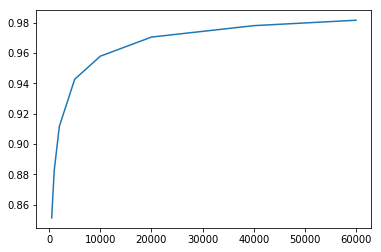

In [173]:
avgInv = [0.8676161290322577, 0.9078258064516129, 0.9303193548387099, 0.9508741935483871, 0.9606064516129031, 0.9720838709677418,0.9787870967741935,0.9804806451612905]
print(avgInv)
plt.figure()
plt.plot([500, 1000, 2000, 5000, 10000, 20000, 40000, 60000], averages)
plt.show()

### Comparison

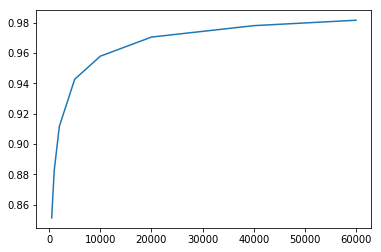

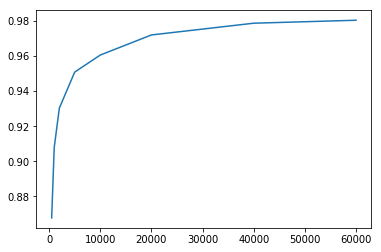

averages: [0.8511548387096777, 0.8823999999999996, 0.9115645161290319, 0.9426000000000007, 0.957812903225807, 0.9704290322580648, 0.9779645161290328, 0.9815387096774097]

inverted averages: [0.8676161290322577, 0.9078258064516129, 0.9303193548387099, 0.9508741935483871, 0.9606064516129031, 0.9720838709677418, 0.9787870967741935, 0.9804806451612905]

1.65%
2.54%
1.88%
0.83%
0.28%
0.17%
0.08%
-0.11%


In [174]:
plt.figure()
plt.plot([500, 1000, 2000, 5000, 10000, 20000, 40000, 60000], averages)
plt.show()


plt.figure()
plt.plot([500, 1000, 2000, 5000, 10000, 20000, 40000, 60000], avgInv)
plt.show()

diff = []
for i in range(len(averages)):
    diff.append((avgInv[i] - averages[i])*100)

print(f"averages: {averages}\n")
print(f"inverted averages: {avgInv}\n")
for perc in diff:
    print(f'{round(perc,2)}%',)
# print([0.8676161290322577, 0.9078258064516129, 0.9303193548387099, 0.9508741935483871, 0.9606064516129031, 0.9720838709677418,0.9787870967741935,0.9804806451612905])

### Normal and inverted images one of each

In [164]:
(_x_train, _y_train), (_x_test, _y_test) = mnist.load_data()

(1000, 10)


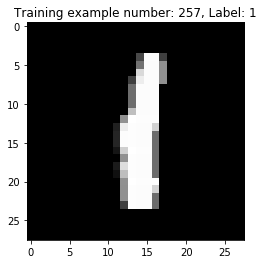

In [163]:
x_train = (_x_train.reshape(60000, 784).astype("float32") / 255)[:500,:]
inverted_x_train = ((255 - _x_train.reshape(60000, 784).astype("float32"))/255)[:500,:]
merged_array = np.vstack((x_train[0], inverted_x_train[0]))
merged_targets = np.vstack((_y_train[0], _y_train[0]))
for i in range(1, len(x_train)):
    merged_array = np.concatenate((merged_array, np.vstack((x_train[i], inverted_x_train[i]))))
    merged_targets = np.concatenate((merged_targets, np.vstack((_y_train[i], _y_train[i]))))

merged_targets = keras.utils.to_categorical(merged_targets, 10)

print(merged_targets.shape)

num = 257

digit = merged_array[num].reshape(28,28)
# if inverted:
#     digit = inverted_x_train[num].reshape(28,28)
plt.figure()
plt.title(f"Training example number: {num}, Label: {merged_targets[num].argmax(axis=0)}")
plt.imshow(digit, cmap = plt.get_cmap("gray_r"))
plt.show()



In [171]:
trialsConcat = []
accsConcat = []
accuraciesConcat = 0
examples = 500
counts = [1000, 2000, 5000, 10000, 20000, 40000, 60000]
k = 0
averagesConcat = []
x_test = _x_test.reshape(10000, 784).astype("float32") / 255
y_test = keras.utils.to_categorical(_y_test, 10)
print(_x_test.shape, _y_test.shape)
while examples <= 80000:
    x_train = (_x_train.reshape(60000, 784).astype("float32") / 255)[:examples,:]
    inverted_x_train = ((255 - _x_train.reshape(60000, 784).astype("float32"))/255)[:examples,:]
    merged_array = np.vstack((x_train[0], inverted_x_train[0]))
    merged_targets = np.vstack((_y_train[0], _y_train[0]))
    print("rearranging samples...")
    for i in range(1, examples):
        merged_array = np.concatenate((merged_array, np.vstack((x_train[i], inverted_x_train[i]))))
        merged_targets = np.concatenate((merged_targets, np.vstack((_y_train[i], _y_train[i]))))
    x_train = merged_array
    y_train = keras.utils.to_categorical(merged_targets, 10) 
    for i in range(1,32):
        print(f"Trial number: {i}")
        history = model.fit(x_train, y_train,
                       batch_size=100,
                       epochs=10,
                       verbose=2,
                       validation_data=(x_test,y_test))
        acc = model.evaluate(x_test, y_test, verbose=0)[1]
        trial = "| {0} | {1} |".format(i,  acc)
        accsConcat.append(acc)
        accuraciesConcat += acc
        trialsConcat.append(trial)
    average = accuraciesConcat / 31
    averagesConcat.append(average)
    accuraciesConcat = 0
#     for t in trialsConcat:
#         print(t)
    print(f"Average: {average}")
    examples = counts[k]
    k += 1

(10000, 28, 28) (10000,)
rearranging samples...
Trial number: 1
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 13.6049 - acc: 0.1210 - val_loss: 9.4647 - val_acc: 0.2768
Epoch 2/10
 - 0s - loss: 11.8587 - acc: 0.2290 - val_loss: 8.1981 - val_acc: 0.3745
Epoch 3/10
 - 0s - loss: 10.9219 - acc: 0.2890 - val_loss: 7.2525 - val_acc: 0.4505
Epoch 4/10
 - 0s - loss: 10.3548 - acc: 0.3360 - val_loss: 6.7894 - val_acc: 0.4811
Epoch 5/10
 - 0s - loss: 10.0364 - acc: 0.3650 - val_loss: 6.3966 - val_acc: 0.5037
Epoch 6/10
 - 0s - loss: 9.7846 - acc: 0.3780 - val_loss: 5.9130 - val_acc: 0.5342
Epoch 7/10
 - 0s - loss: 9.4854 - acc: 0.3990 - val_loss: 5.4932 - val_acc: 0.5612
Epoch 8/10
 - 0s - loss: 9.3144 - acc: 0.4160 - val_loss: 5.3276 - val_acc: 0.5730
Epoch 9/10
 - 0s - loss: 9.1874 - acc: 0.4250 - val_loss: 5.0541 - val_acc: 0.5887
Epoch 10/10
 - 0s - loss: 9.0741 - acc: 0.4340 - val_loss: 4.7630 - val_acc: 0.6083
Trial number: 2
Train on 1000 samples, validate on 

 - 0s - loss: 7.7045 - acc: 0.5220 - val_loss: 2.7504 - val_acc: 0.7478
Epoch 2/10
 - 0s - loss: 7.7045 - acc: 0.5220 - val_loss: 2.7466 - val_acc: 0.7482
Epoch 3/10
 - 0s - loss: 7.7045 - acc: 0.5220 - val_loss: 2.7437 - val_acc: 0.7486
Epoch 4/10
 - 0s - loss: 7.7045 - acc: 0.5220 - val_loss: 2.7423 - val_acc: 0.7486
Epoch 5/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7409 - val_acc: 0.7485
Epoch 6/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7399 - val_acc: 0.7488
Epoch 7/10
 - 1s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7390 - val_acc: 0.7490
Epoch 8/10
 - 1s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7385 - val_acc: 0.7493
Epoch 9/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7381 - val_acc: 0.7494
Epoch 10/10
 - 1s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7378 - val_acc: 0.7493
Trial number: 11
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7380 - val_acc: 0.7492
Epoch 2/10
 - 1s - loss: 7.7044

Epoch 3/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 4/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 5/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 6/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 7/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 8/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 9/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 10/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Trial number: 20
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 2/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 3/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 4/10
 - 1s - l

Epoch 5/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 6/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 7/10
 - 1s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 8/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 9/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 10/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Trial number: 29
Train on 1000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 2/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 3/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 4/10
 - 0s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 5/10
 - 1s - loss: 7.7044 - acc: 0.5220 - val_loss: 2.7369 - val_acc: 0.7498
Epoch 6/10
 - 0s - l

Epoch 6/10
 - 0s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 7/10
 - 0s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 8/10
 - 0s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 9/10
 - 0s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 10/10
 - 0s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Trial number: 7
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 0s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 2/10
 - 0s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 3/10
 - 0s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 4/10
 - 0s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 5/10
 - 0s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 6/10
 - 0s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 7/10
 - 0s - lo

Epoch 8/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 9/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 10/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Trial number: 16
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 2/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 3/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 4/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 5/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 6/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 7/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 8/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 9/10
 - 1s - l

Epoch 10/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Trial number: 25
Train on 2000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 2/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 3/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 4/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 5/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 6/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 7/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 8/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 9/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Epoch 10/10
 - 1s - loss: 7.7609 - acc: 0.5185 - val_loss: 1.9368 - val_acc: 0.8160
Trial number: 26
Tr

Trial number: 3
Train on 4000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2927 - val_acc: 0.8818
Epoch 2/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2918 - val_acc: 0.8818
Epoch 3/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2911 - val_acc: 0.8817
Epoch 4/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2905 - val_acc: 0.8816
Epoch 5/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2896 - val_acc: 0.8817
Epoch 6/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2891 - val_acc: 0.8816
Epoch 7/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2887 - val_acc: 0.8816
Epoch 8/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2885 - val_acc: 0.8816
Epoch 9/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2880 - val_acc: 0.8816
Epoch 10/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2880 - val_acc: 0.8815
Trial number: 4
Train on 4000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 7.5272 - acc: 

Epoch 2/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 3/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 4/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 5/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 6/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 7/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 8/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 9/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 10/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Trial number: 13
Train on 4000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 2/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 3/10
 - 1s - l

Epoch 4/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 5/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 6/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 7/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 8/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 9/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 10/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Trial number: 22
Train on 4000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 2/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 3/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 4/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 5/10
 - 1s - l

Epoch 6/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 7/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 8/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 9/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 10/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Trial number: 31
Train on 4000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 2/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 3/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 4/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 5/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 6/10
 - 1s - loss: 7.5272 - acc: 0.5330 - val_loss: 1.2875 - val_acc: 0.8821
Epoch 7/10
 - 1s - l

Epoch 7/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 8/10
 - 2s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 9/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 10/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Trial number: 9
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 2/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 3/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 4/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 5/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 6/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 7/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 8/10
 - 1s - l

Epoch 9/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 10/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Trial number: 18
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 2/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 3/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 4/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 5/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 6/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 7/10
 - 2s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 8/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 9/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 10/10
 - 1s -

Trial number: 27
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 2/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 3/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 4/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 5/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 6/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 7/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 8/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 9/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Epoch 10/10
 - 1s - loss: 7.3853 - acc: 0.5418 - val_loss: 0.8276 - val_acc: 0.9257
Trial number: 28
Train on 10000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 7.3853 - a

 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5997 - val_acc: 0.9449
Epoch 2/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5997 - val_acc: 0.9449
Epoch 3/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5997 - val_acc: 0.9449
Epoch 4/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5997 - val_acc: 0.9449
Epoch 5/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5997 - val_acc: 0.9449
Epoch 6/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 7/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 8/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5997 - val_acc: 0.9450
Epoch 9/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 10/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Trial number: 6
Train on 20000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 2/10
 - 2s - loss: 7.3305

Epoch 3/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 4/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 5/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 6/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 7/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 8/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 9/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 10/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Trial number: 15
Train on 20000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 2/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 3/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 4/10
 - 2s - 

Epoch 5/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 6/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 7/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 8/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 9/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 10/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Trial number: 24
Train on 20000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 2/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 3/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 4/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 5/10
 - 2s - loss: 7.3305 - acc: 0.5452 - val_loss: 0.5996 - val_acc: 0.9450
Epoch 6/10
 - 2s - 

Epoch 6/10
 - 4s - loss: 7.3402 - acc: 0.5436 - val_loss: 0.5037 - val_acc: 0.9548
Epoch 7/10
 - 4s - loss: 7.3337 - acc: 0.5443 - val_loss: 0.4960 - val_acc: 0.9565
Epoch 8/10
 - 4s - loss: 7.3321 - acc: 0.5445 - val_loss: 0.4743 - val_acc: 0.9563
Epoch 9/10
 - 4s - loss: 7.3303 - acc: 0.5445 - val_loss: 0.4791 - val_acc: 0.9567
Epoch 10/10
 - 4s - loss: 7.3275 - acc: 0.5450 - val_loss: 0.4896 - val_acc: 0.9577
Trial number: 2
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 7.3260 - acc: 0.5452 - val_loss: 0.4839 - val_acc: 0.9579
Epoch 2/10
 - 4s - loss: 7.3244 - acc: 0.5454 - val_loss: 0.4598 - val_acc: 0.9607
Epoch 3/10
 - 4s - loss: 7.3229 - acc: 0.5455 - val_loss: 0.4818 - val_acc: 0.9581
Epoch 4/10
 - 4s - loss: 7.3222 - acc: 0.5456 - val_loss: 0.4687 - val_acc: 0.9586
Epoch 5/10
 - 4s - loss: 7.3223 - acc: 0.5456 - val_loss: 0.4850 - val_acc: 0.9578
Epoch 6/10
 - 4s - loss: 7.3216 - acc: 0.5456 - val_loss: 0.4731 - val_acc: 0.9590
Epoch 7/10
 - 4s - l

Epoch 8/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 9/10
 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 10/10
 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Trial number: 11
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 2/10
 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 3/10
 - 5s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 4/10
 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 5/10
 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 6/10
 - 5s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 7/10
 - 5s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 8/10
 - 5s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 9/10
 - 4s - 

Epoch 10/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Trial number: 20
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 2/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 3/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 4/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 5/10
 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 6/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 7/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 8/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 9/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 10/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Trial number: 21
T

 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 2/10
 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 3/10
 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 4/10
 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 5/10
 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 6/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 7/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 8/10
 - 4s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 9/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 10/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Trial number: 30
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 7.3168 - acc: 0.5460 - val_loss: 0.4435 - val_acc: 0.9614
Epoch 2/10
 - 3s - loss: 7.316

KeyboardInterrupt: 

In [ ]:
x_train = (_x_train.reshape(60000, 784).astype("float32") / 255)[:500,:]
inverted_x_train = ((255 - _x_train.reshape(60000, 784).astype("float32"))/255)[:500,:]
# display_sample(6, inverted=True)
x_train = np.concatenate((x_train, inverted_x_train), axis=0)
print(x_train.shape)
x_test = _x_test.reshape(10000, 784).astype("float32") / 255
y_train = keras.utils.to_categorical(_y_train, 10)[:500,:]
y_train =  np.concatenate((y_train, y_train), axis=0)
print(y_train.shape)
y_test = keras.utils.to_categorical(_y_test, 10)

print(f"x_train shape: {x_train.shape}\ny_train shape: {y_train.shape}\nx_test shape: {x_test.shape}\ny_test shape: {y_test.shape}\n")

In [176]:
print("averages: [0.8511548387096777, 0.8823999999999996, 0.9115645161290319, 0.9426000000000007, 0.957812903225807, 0.9704290322580648, 0.9779645161290328, 0.9815387096774097]")
print(f"one of each: {averagesConcat}")


averages: [0.8511548387096777, 0.8823999999999996, 0.9115645161290319, 0.9426000000000007, 0.957812903225807, 0.9704290322580648, 0.9779645161290328, 0.9815387096774097]
one of each: [0.7376483870967745, 0.8157548387096772, 0.881803225806452, 0.9253838709677413, 0.9448258064516132, 0.9611709677419359]
